In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv("Coimbra_breast_cancer_dataset.csv")

# check the dimension of the dataset
print(data.shape)

# view the first 5 rows of the dataset
data.head()

(116, 10)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


# Exploratory Data Analysis

Distribution of Samples by Labels Healthy Control vs Patients

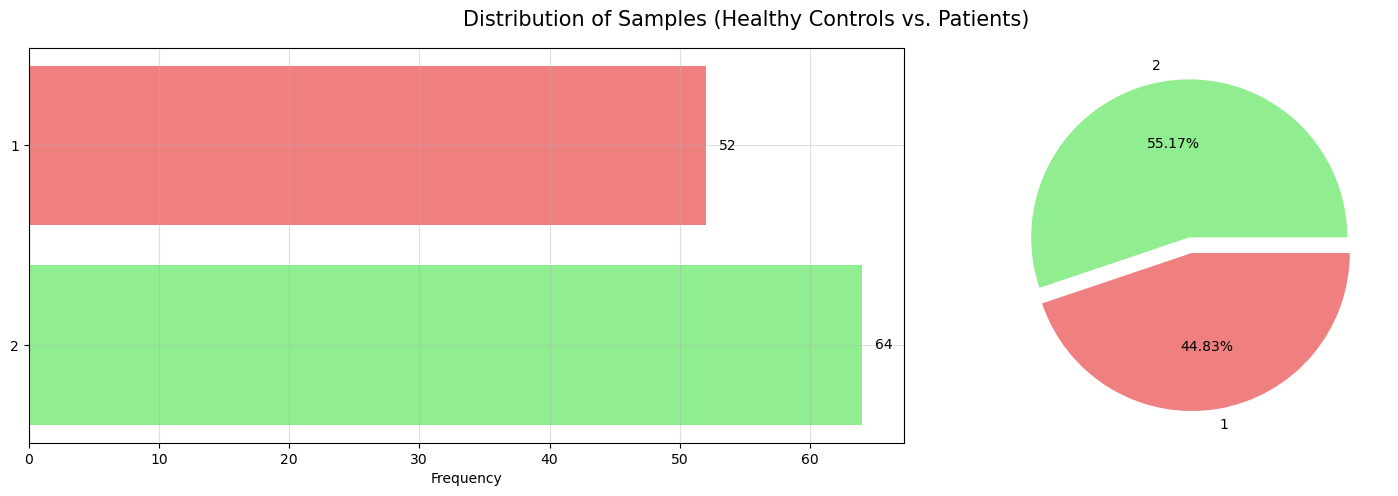

In [4]:
# distribution of the samples by labels

labels = data['Classification'].value_counts()
colors = ['lightgreen','lightcoral']

# visualization (bar chart and pie chart)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=labels.index.astype(str), width=labels.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate(labels):
    axes[0].text(values+1, index, str(values), va='center')

axes[0].grid(alpha=0.4)

axes[1].pie(labels.values, labels=labels.index, colors=colors, explode=([0.05]*len(labels.index)), autopct='%.2f%%')
figure.suptitle('Distribution of Samples (Healthy Controls vs. Patients)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [5]:
# define a helper function to perform the statistical analysis
from scipy.stats import ttest_ind

def analyzed(feature):
    # visualization (histogram and boxplot)
    figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
    sns.histplot(data=data, x=data[feature], hue=data['Classification'], bins=15, palette=colors, ax=axes[0])
    axes[0].grid(alpha=0.4)
    sns.boxplot(data=data, x=data['Classification'], y=data[feature], palette=colors, ax=axes[1])
    axes[1].grid(alpha=0.4)
    figure.suptitle(f'Distribution of {feature} between Healthy Controls and Patients', fontsize=15)
    plt.tight_layout(pad=1)
    plt.show()

  # display the summary statistic
    groups = data.groupby('Classification')
    display(groups[feature].describe())

    controls = groups.get_group(1)
    patients = groups.get_group(2)

    # perform independent T-test to compare between 2 groups
    res = ttest_ind(controls[feature], patients[feature])
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'Reject null hypothesis. There is a statistically significant difference of the mean {feature} between health controls and patients. Statistically significant association between {feature} and breast cancer exists in the analyzed data.')
    else:
        print(f'Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between {feature} and breast cancer in the analyzed data.')

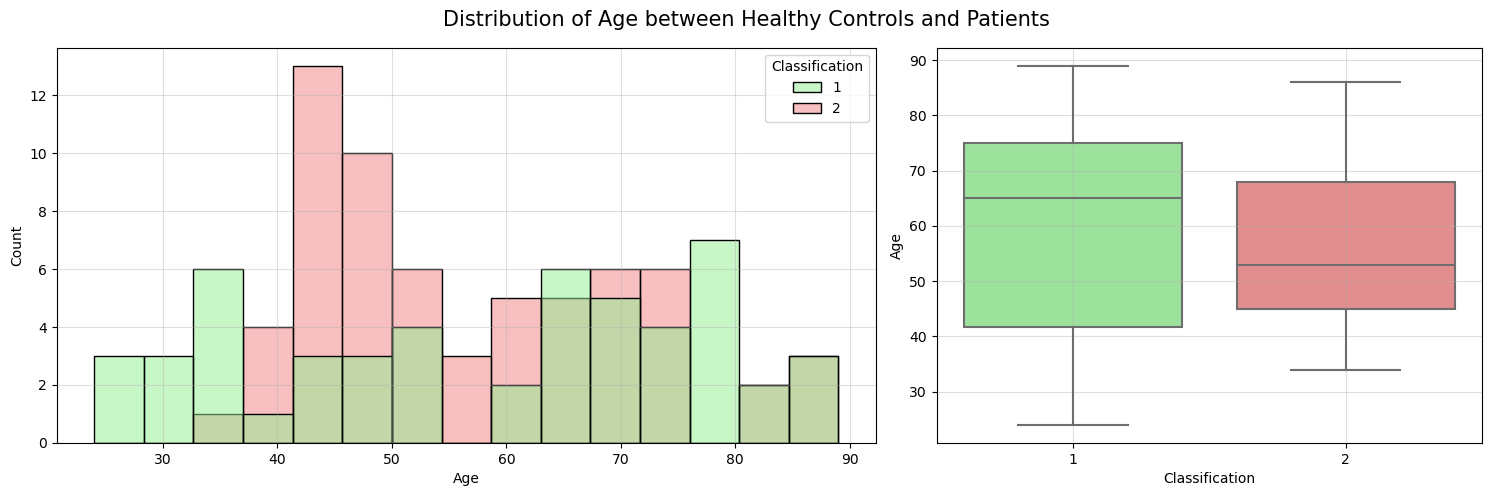

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,58.076923,18.957999,24.0,41.75,65.0,75.0,89.0
2,64.0,56.671875,13.493155,34.0,45.00,53.0,68.0,86.0


Test statistic:  0.4655
Test p-value:  0.6425
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Age and breast cancer in the analyzed data.


In [6]:
analyzed('Age')

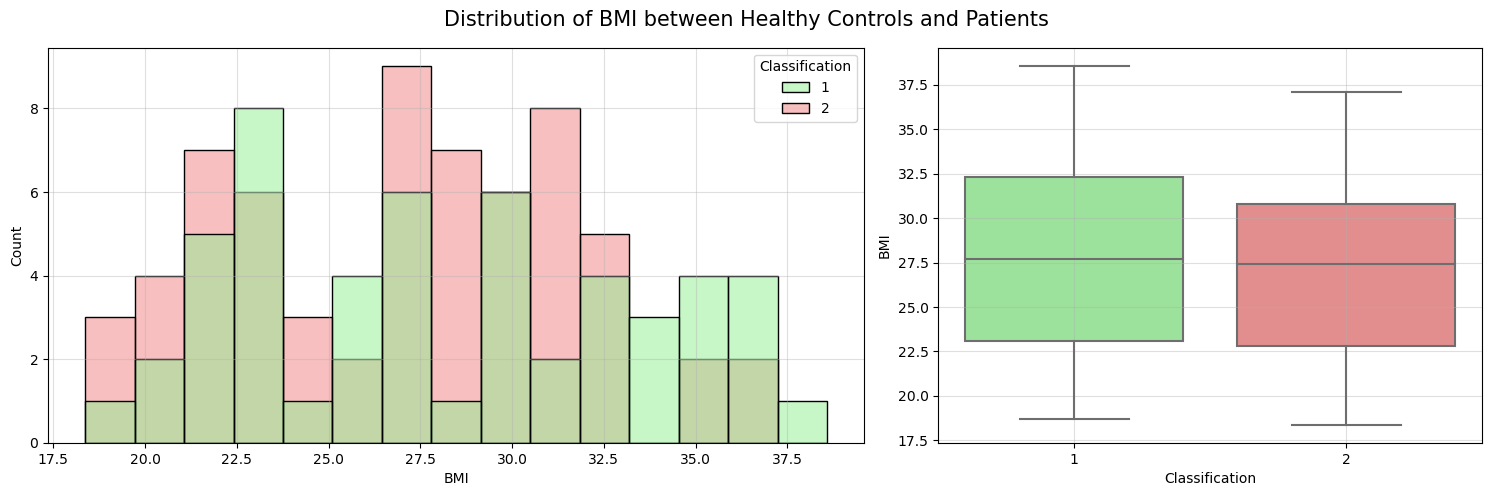

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,28.317336,5.427465,18.67,23.096003,27.694389,32.328091,38.578759
2,64.0,26.984740,4.620398,18.37,22.788722,27.408027,30.810069,37.109375


Test statistic:  1.4282
Test p-value:  0.156
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between BMI and breast cancer in the analyzed data.


In [7]:
analyzed('BMI')

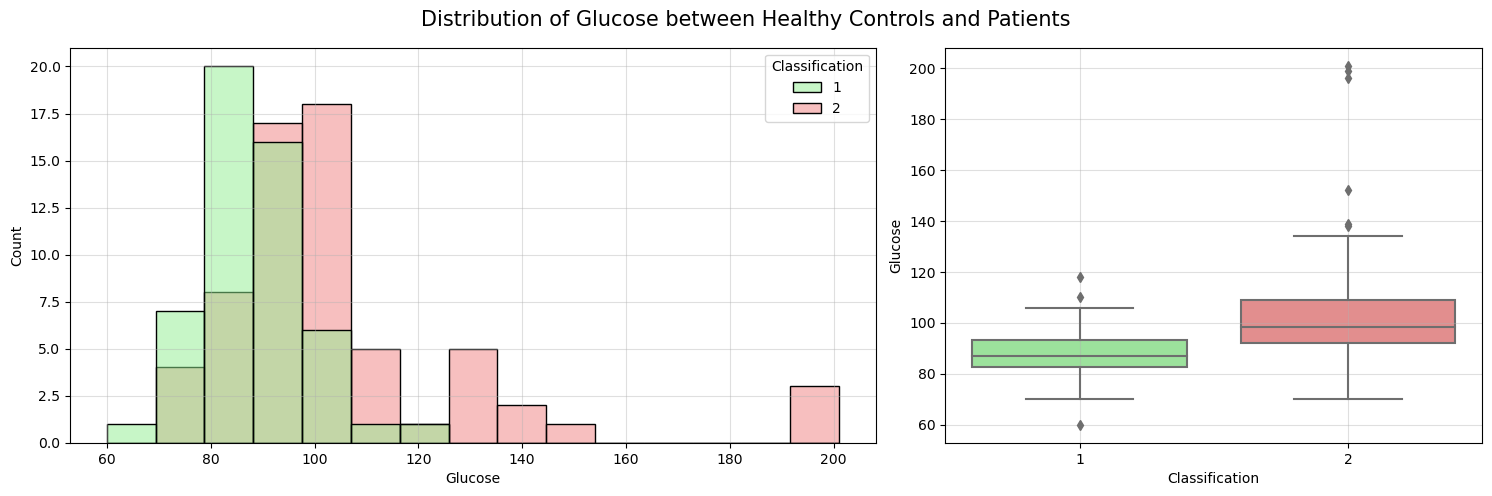

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,88.230769,10.191529,60.0,82.75,87.0,93.25,118.0
2,64.0,105.562500,26.557440,70.0,92.00,98.5,109.00,201.0


Test statistic:  -4.4447
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant difference of the mean Glucose between health controls and patients. Statistically significant association between Glucose and breast cancer exists in the analyzed data.


In [8]:
analyzed('Glucose')

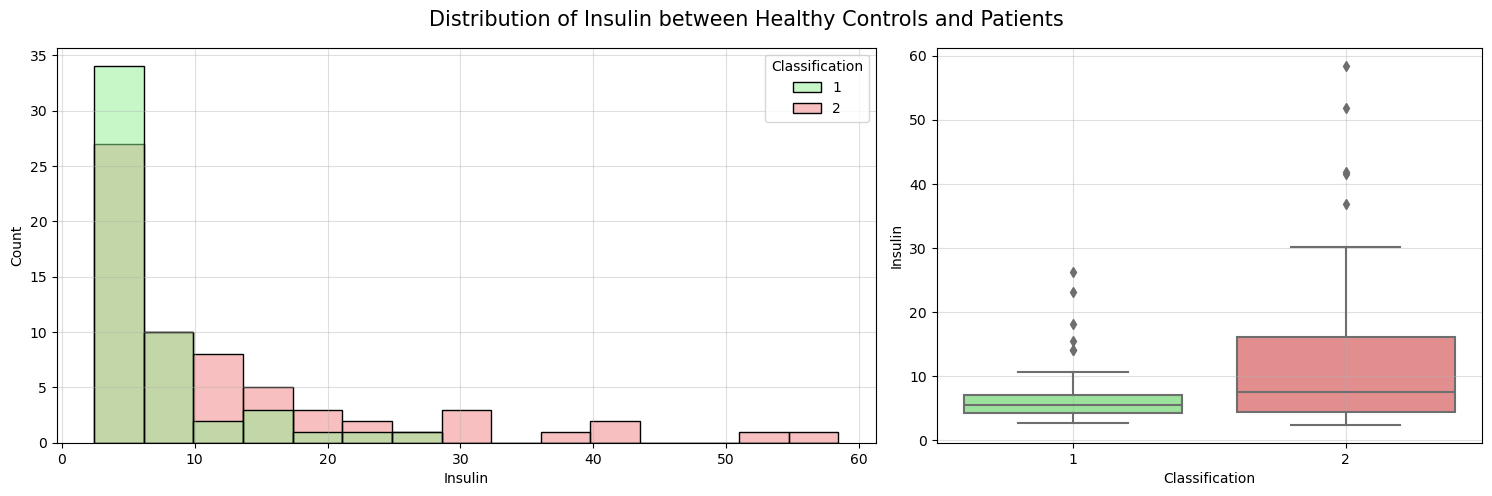

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,6.933769,4.859793,2.707,4.304,5.4835,7.001,26.211
2,64.0,12.513219,12.317738,2.432,4.406,7.5800,16.063,58.460


Test statistic:  -3.0756
Test p-value:  0.0026
Reject null hypothesis. There is a statistically significant difference of the mean Insulin between health controls and patients. Statistically significant association between Insulin and breast cancer exists in the analyzed data.


In [9]:
analyzed('Insulin')

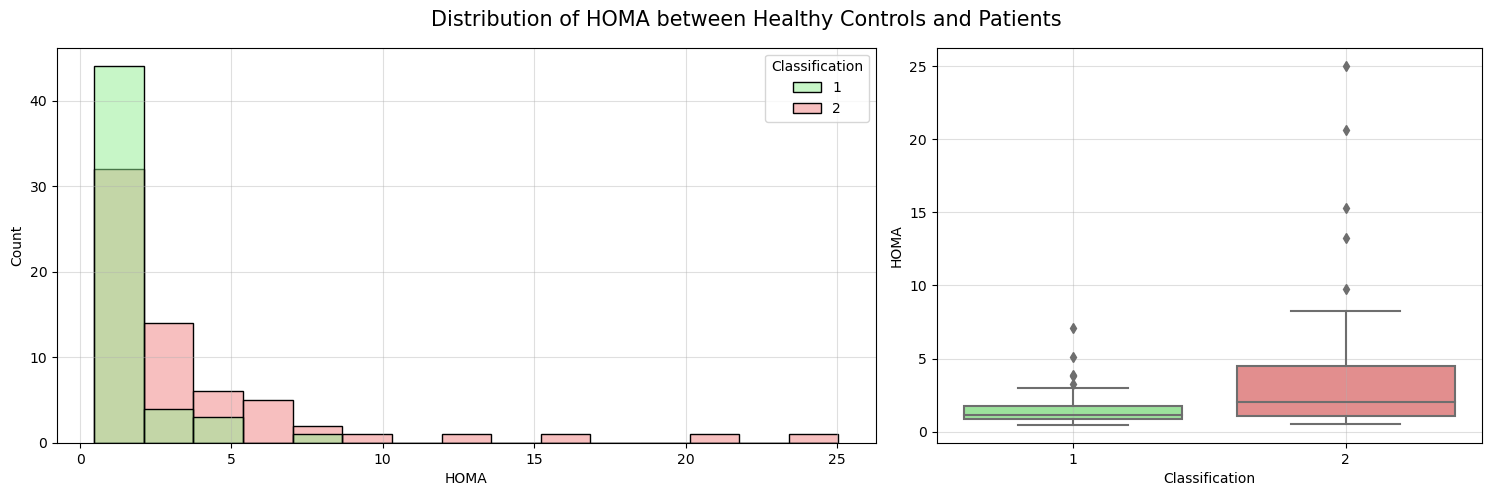

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,1.552398,1.218256,0.467409,0.879510,1.139683,1.774561,7.111918
2,64.0,3.623342,4.588943,0.507936,1.036842,2.052256,4.461312,25.050342


Test statistic:  -3.1627
Test p-value:  0.002
Reject null hypothesis. There is a statistically significant difference of the mean HOMA between health controls and patients. Statistically significant association between HOMA and breast cancer exists in the analyzed data.


In [10]:
analyzed('HOMA')

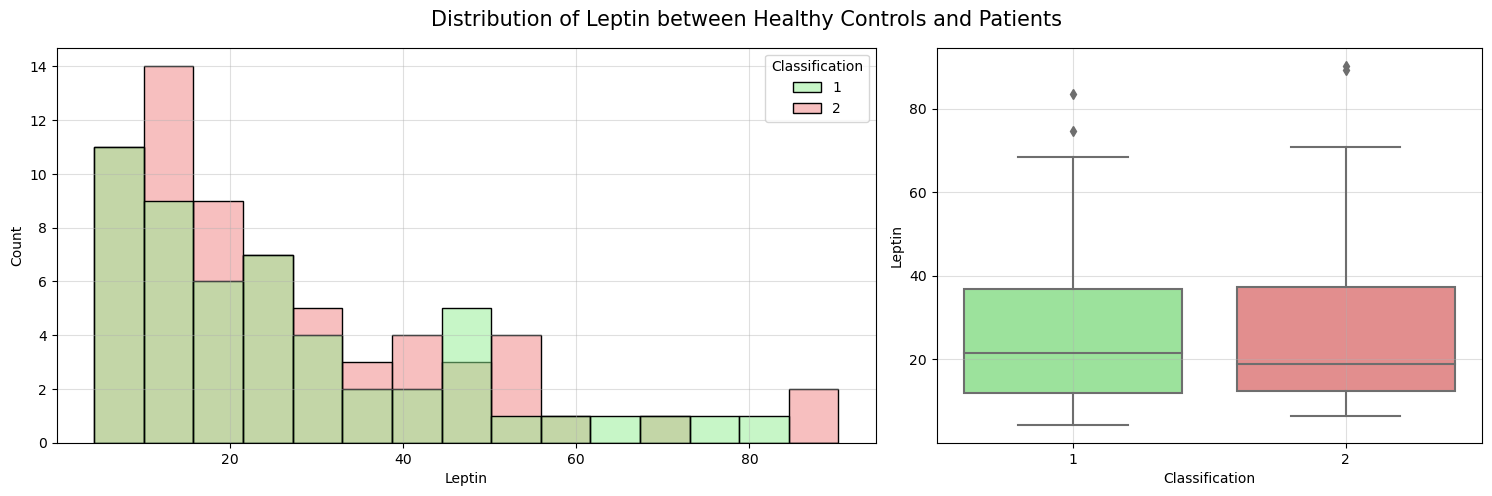

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,26.637933,19.334699,4.3110,11.845750,21.49485,36.7216,83.4821
2,64.0,26.596512,19.212451,6.3339,12.402925,18.87765,37.3783,90.2800


Test statistic:  0.0115
Test p-value:  0.9908
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Leptin and breast cancer in the analyzed data.


In [11]:
analyzed('Leptin')

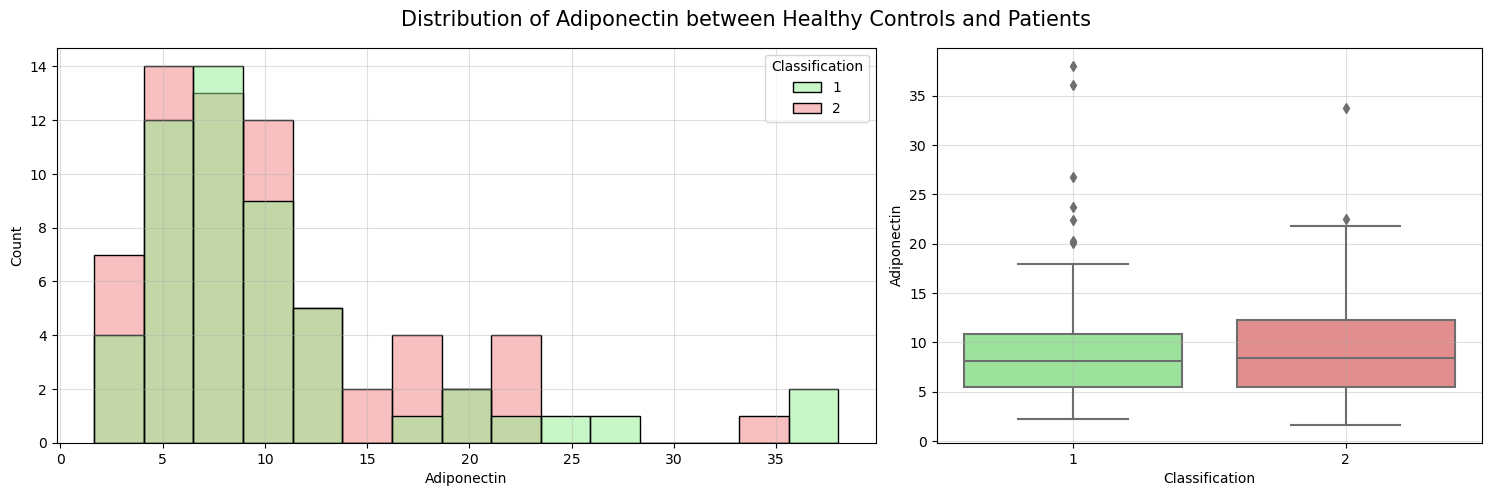

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,10.328205,7.631281,2.19428,5.454286,8.127775,10.820219,38.04
2,64.0,10.061167,6.189466,1.65602,5.484117,8.446438,12.254740,33.75


Test statistic:  0.2081
Test p-value:  0.8355
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Adiponectin and breast cancer in the analyzed data.


In [12]:
analyzed('Adiponectin')

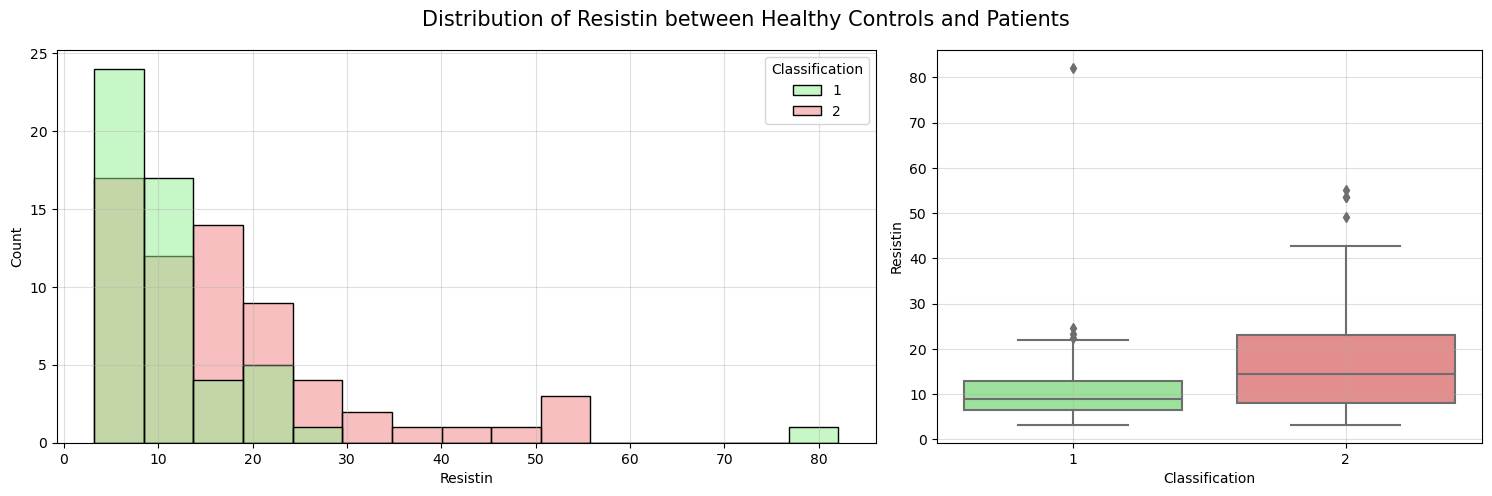

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,11.614813,11.447053,3.29175,6.597523,8.929190,12.808525,82.1000
2,64.0,17.253777,12.636979,3.21000,8.113675,14.371825,22.965170,55.2153


Test statistic:  -2.4923
Test p-value:  0.0141
Reject null hypothesis. There is a statistically significant difference of the mean Resistin between health controls and patients. Statistically significant association between Resistin and breast cancer exists in the analyzed data.


In [13]:
analyzed('Resistin')

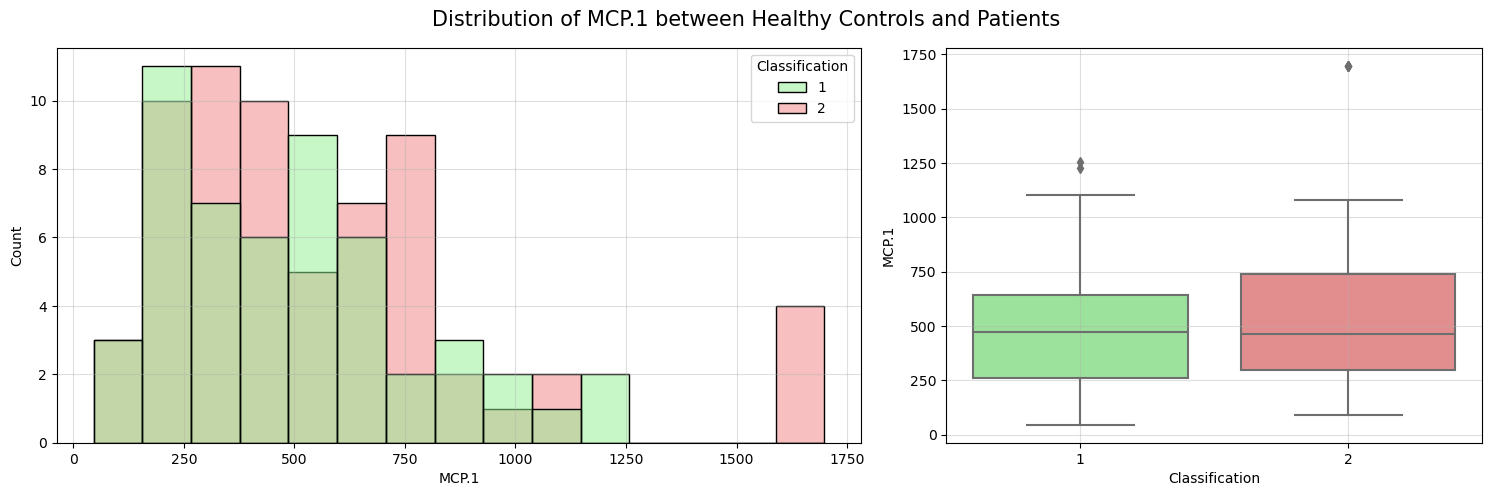

,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
1,52.0,499.730692,292.242157,45.843,260.73650,471.3225,642.9335,1256.083
2,64.0,563.016500,384.001622,90.090,299.18825,465.3740,737.7625,1698.440


Test statistic:  -0.9798
Test p-value:  0.3293
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between MCP.1 and breast cancer in the analyzed data.


In [14]:
analyzed('MCP.1')

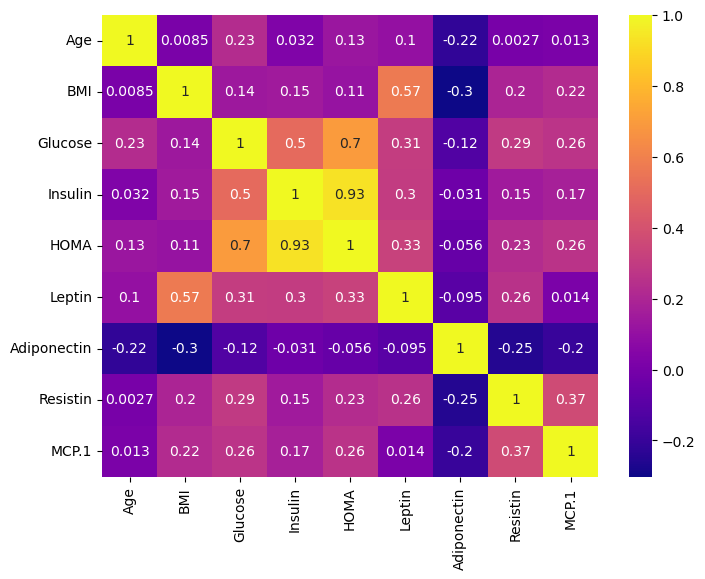

In [15]:
# calcualte the Pearson's correlation between features
fil_df = data.drop(columns=['Classification'], axis=1)
correlation = fil_df.corr()

# visualize the correlation in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

# Classification

Data Pre-processing for Training Models

In [16]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test data (80:20 ratio)
train, test = train_test_split(data, test_size=0.2, random_state=122)

# check the dimension of the train and test data
print('Training data: ', train.shape)
print('Test data: ', test.shape)

Training data:  (92, 10)
Test data:  (24, 10)


In [17]:
# segregate the feature matrix and target vector from train and test data
Xtrain = train.drop(columns=['Classification'], axis=1)
ytrain = train['Classification']

Xtest = test.drop(columns=['Classification'], axis=1)
ytest = test['Classification']

In [18]:
# scale the training and test data
from sklearn.preprocessing import MinMaxScaler

# initialize a MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Model 1 | Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Accuracy:  0.7064327485380117


In [20]:
# evaluate the best model on the test set
test_accuracy = best_tree.score(Xtest_scaled, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.75


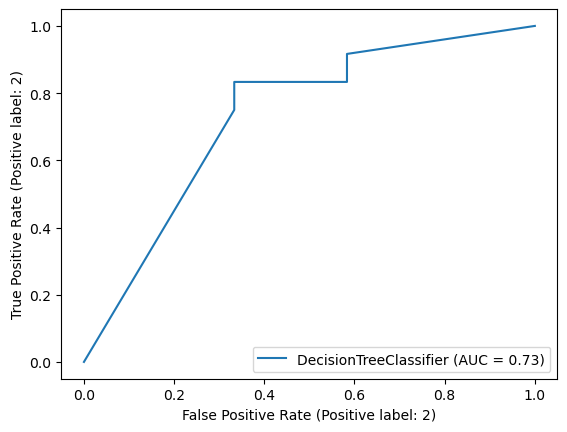

In [21]:
from sklearn.metrics import RocCurveDisplay

# check the ROC AUC curve
RocCurveDisplay.from_estimator(best_tree, Xtest_scaled, ytest)
plt.show()

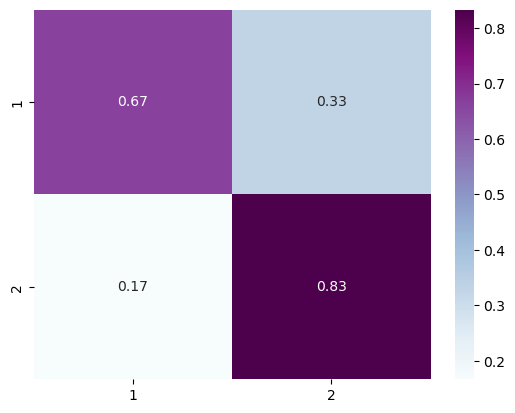

In [22]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

ypred_tree = best_tree.predict(Xtest_scaled)

labels = ytest.unique()

cm_tree = confusion_matrix(ytest, ypred_tree, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [23]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(ytest, ypred_tree)
print(tree_report)

              precision    recall  f1-score   support

           1       0.80      0.67      0.73        12
           2       0.71      0.83      0.77        12

    accuracy                           0.75        24
   macro avg       0.76      0.75      0.75        24
weighted avg       0.76      0.75      0.75        24



Model 2 | Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy:  0.7707602339181286


In [25]:
# evaluate the best model on the test set
test_accuracy = best_logreg.score(Xtest_scaled, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.6666666666666666


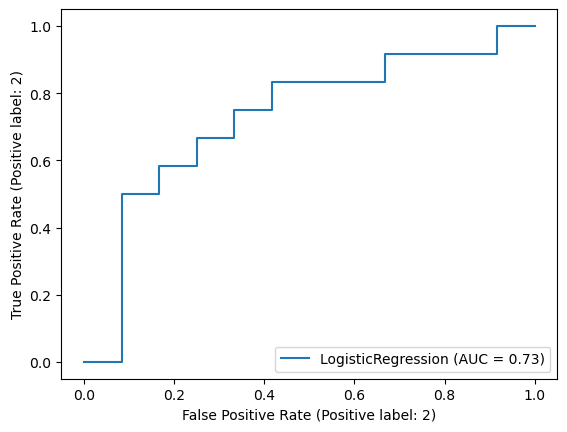

In [26]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(best_logreg, Xtest_scaled, ytest)
plt.show()


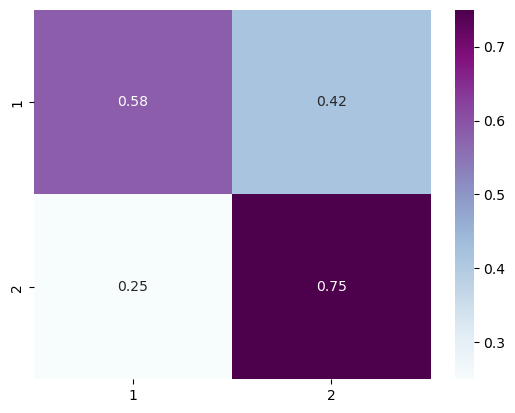

In [27]:
# visualize the confusion matrix using a heatmap
ypred_lr = best_logreg.predict(Xtest_scaled)

labels = ytest.unique()

cm_logistic = confusion_matrix(ytest, ypred_lr, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [28]:
# classification report
print(classification_report(ytest, ypred_lr))

              precision    recall  f1-score   support

           1       0.70      0.58      0.64        12
           2       0.64      0.75      0.69        12

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.66        24
weighted avg       0.67      0.67      0.66        24



Feature Selection (by selecting features that are statistically significant associated with the target)

In [29]:
# subset the features statistically significant to target labels
imp_feats = ['Glucose','Insulin','Resistin']

fil_data = data[imp_feats]


In [30]:
# split the filtered dataset into training and test data (80:20 ratio)
Xtrain_fil, Xtest_fil, ytrain_fil, ytest_fil = train_test_split(fil_data, data['Classification'], test_size=0.2, random_state=122)

In [31]:
# initialize a MinMaxScaler object
scaler2 = MinMaxScaler()
Xtrain_scaled2 = scaler2.fit_transform(Xtrain_fil)
Xtest_scaled2 = scaler2.transform(Xtest_fil)

Model 3 | Decision Tree (with selected Features)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree2 = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree2.fit(Xtrain_scaled2, ytrain_fil)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree2.best_params_)
print('Best Accuracy: ', grid_search_tree2.best_score_)

# get the best model
best_tree2 = grid_search_tree2.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.7181286549707602


In [33]:
# evaluate the best model on the test set
test_accuracy = best_tree2.score(Xtest_scaled2, ytest_fil)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.5833333333333334


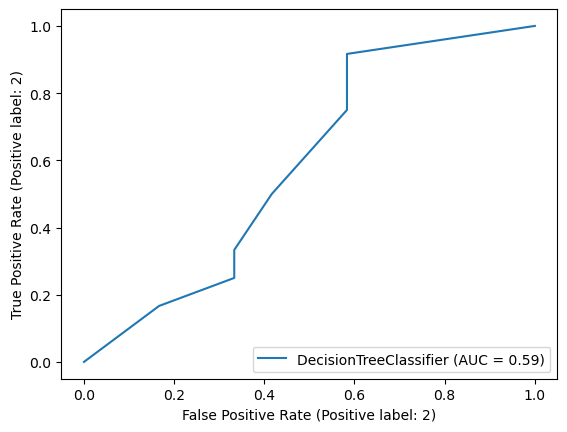

In [34]:
# check the ROC AUC curve
RocCurveDisplay.from_estimator(best_tree2, Xtest_scaled2, ytest_fil)
plt.show()

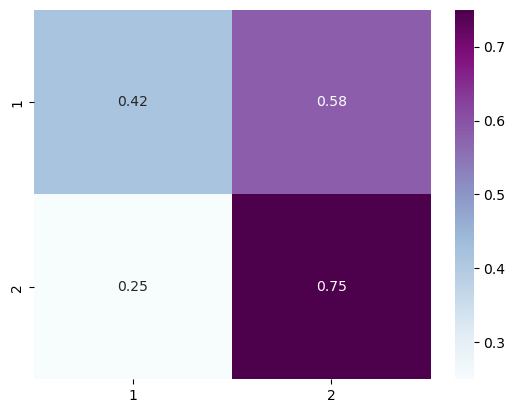

In [35]:
# confusion matrix
ypred_tree2 = best_tree2.predict(Xtest_scaled2)

labels = ytest.unique()

cm_tree2 = confusion_matrix(ytest_fil, ypred_tree2, normalize='true')
plt.figure()
sns.heatmap(cm_tree2, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [36]:
# classification report
tree_report2 = classification_report(ytest_fil, ypred_tree2)
print(tree_report2)

              precision    recall  f1-score   support

           1       0.62      0.42      0.50        12
           2       0.56      0.75      0.64        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.57        24
weighted avg       0.59      0.58      0.57        24



Model 4 | Logistic Regression (with selected Features)

In [37]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg2 = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg2.fit(Xtrain_scaled2, ytrain_fil)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg2.best_params_)
print('Best Accuracy: ', grid_search_logreg2.best_score_)

# get the best model
best_logreg2 = grid_search_logreg2.best_estimator_

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.7608187134502924


In [38]:
# evaluate the best model on the test set
test_accuracy = best_logreg2.score(Xtest_scaled2, ytest_fil)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.6666666666666666


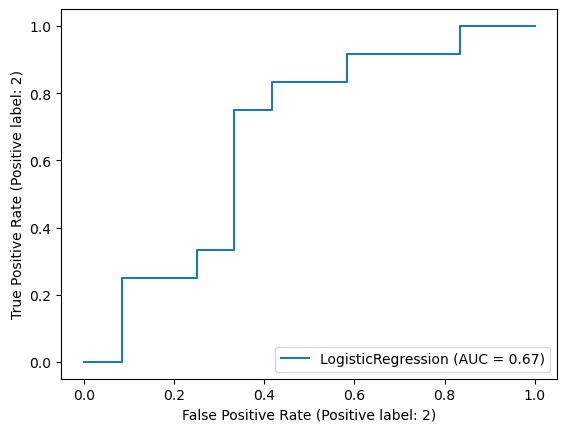

In [39]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(best_logreg2, Xtest_scaled2, ytest_fil)
plt.show()

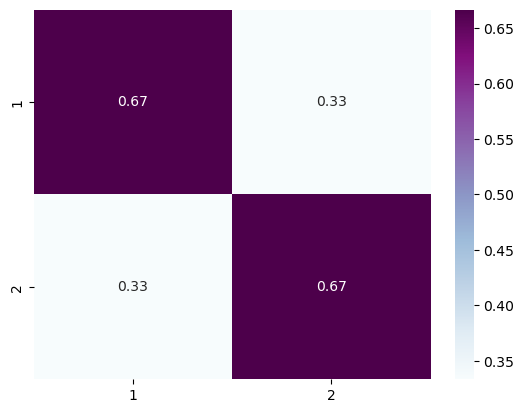

In [40]:
# visualize the confusion matrix using a heatmap
ypred_lr2 = best_logreg2.predict(Xtest_scaled2)

labels = ytest.unique()

cm_logistic2 = confusion_matrix(ytest_fil, ypred_lr2, normalize='true')
plt.figure()
sns.heatmap(cm_logistic2, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [41]:
# classification report
print(classification_report(ytest_fil, ypred_lr2))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67        12
           2       0.67      0.67      0.67        12

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.67      0.67      0.67        24



# Classification Model Performance

Comparison of Classification Models

In [42]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [43]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest_scaled,ytest,best_tree,'Decision Tree (All Features)')
logistic_summary = performance_evaluation(Xtest_scaled,ytest,best_logreg,'Logistic Regression (All Features)')

tree_summary2 = performance_evaluation(Xtest_scaled2,ytest,best_tree2,'Decision Tree (Selected Features)')
logistic_summary2 = performance_evaluation(Xtest_scaled2,ytest,best_logreg2,'Logistic Regression (Selected Features)')

# combine the summary of each model into a dataframe 
comparison_df = pd.concat([tree_summary,logistic_summary,tree_summary2,logistic_summary2], axis=1)

# disply the summary dafaframe
display(comparison_df)

,Decision Tree (All Features),Logistic Regression (All Features),Decision Tree (Selected Features),Logistic Regression (Selected Features)
Accuracy,0.750000,0.666667,0.583333,0.666667
Precision,0.757143,0.671429,0.593750,0.666667
Recall,0.750000,0.666667,0.583333,0.666667
F1_Score,0.748252,0.664336,0.571429,0.666667


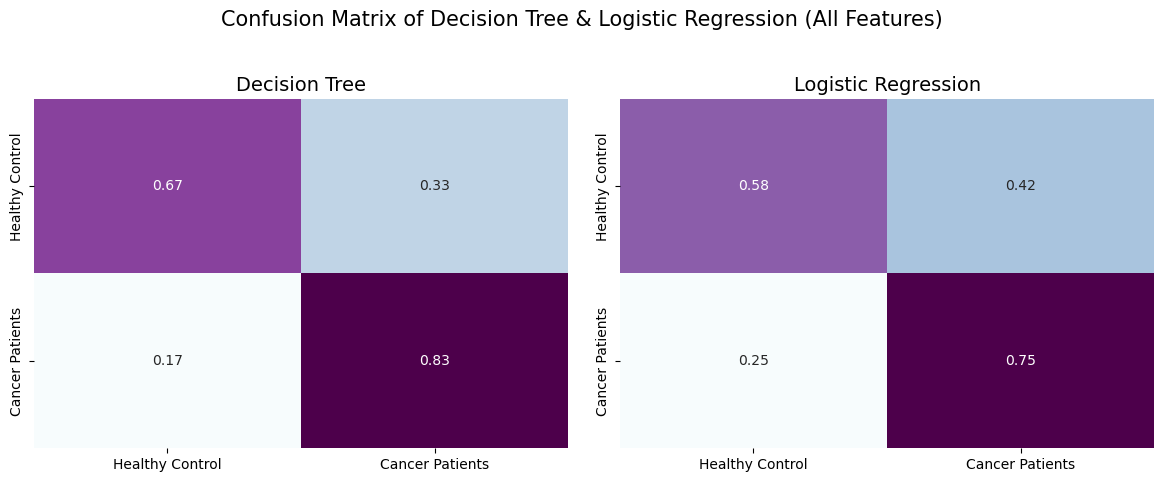

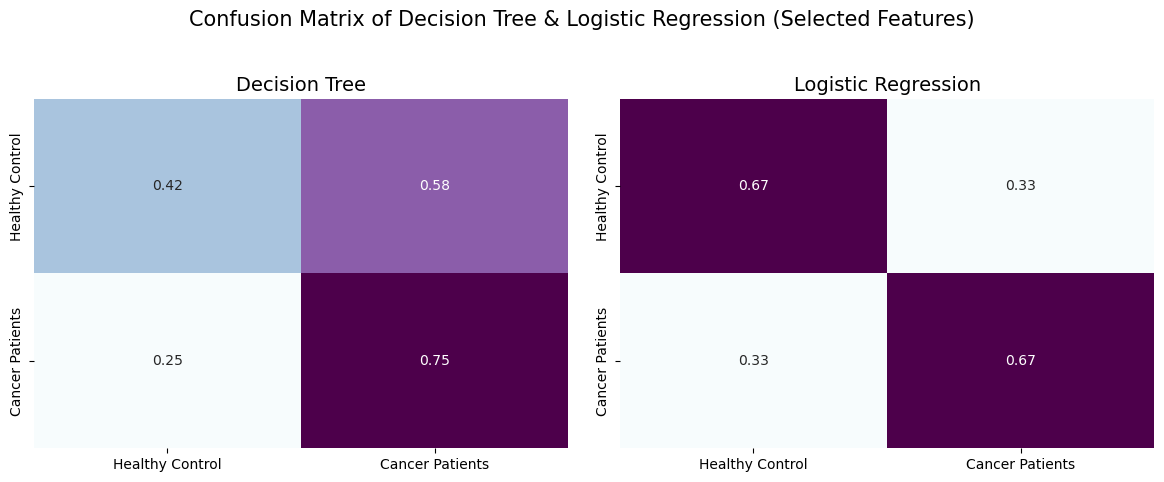

In [44]:
# confusion matrix for classification models

labels = ['Healthy Control', 'Cancer Patients']

figure, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0])
axes[0].set_title('Decision Tree', fontsize=14)
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1])
axes[1].set_title('Logistic Regression', fontsize=14)
figure.suptitle('Confusion Matrix of Decision Tree & Logistic Regression (All Features)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

figure, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_tree2, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0])
axes[0].set_title('Decision Tree', fontsize=14)
sns.heatmap(cm_logistic2, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1])
axes[1].set_title('Logistic Regression', fontsize=14)
figure.suptitle('Confusion Matrix of Decision Tree & Logistic Regression (Selected Features)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

# Conclusion

In the analysis of various clinical features in the Coimbra Breast Cancer dataset, it was found that there is a lack of evidence to support a statistically significant association between age and BMI with breast cancer. However, a significant association was identified in the levels of Glucose, Insulin, and HOMA, where the mean values differed significantly between healthy controls and breast cancer patients. Leptin and Adiponectin did not show a statistically significant association with breast cancer. Interestingly, Resistin exhibited a significant difference in mean values between the two groups, suggesting a potential association with breast cancer. Conversely, MCP-1 did not demonstrate a statistically significant relationship with breast cancer. These findings contribute valuable insights into the specific clinical features that may be implicated in breast cancer, providing a nuanced understanding of their potential roles in the disease.

Based on the performance summary of classification models using both Decision Tree and Logistic Regression with all features and selected features, several conclusions can be drawn. It is important to note that these findings are based on a relatively small dataset, and caution should be exercised in generalizing the results to larger populations. The performance metrics indicate that while the Decision Tree model initially outperforms Logistic Regression with all features, the latter exhibits more stable performance, especially after feature selection. However, the dataset's small size introduces a caveat, as feature selection based on statistical analysis does not necessarily guarantee improved model performance. In fact, in the case of the Decision Tree, feature selection led to a decrease in predictive accuracy, underscoring the potential limitations of relying solely on statistical measures for feature selection in small datasets. To enhance model robustness and generalization, it is recommended to consider incorporating domain expertise to guide the feature selection process. Moreover, increasing the dataset size through data augmentation or acquiring additional samples could further strengthen the models' reliability and generalizability. Additionally, exploring more advanced machine learning models or ensemble methods may provide insights into capturing complex relationships within the data. Overall, while these results provide valuable insights, the small dataset size necessitates a cautious interpretation and encourages further exploration with larger datasets and diverse modeling approaches.